In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgb
import datetime
import time

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
ID_52_2020_0809 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_52_2020_0809.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_86_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_13_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_013_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_72_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_072_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_133_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_134_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_135_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_136_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_137_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_138_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [3]:
ID_52_2020_0608 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_52_2020_0608.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


In [25]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [4]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_1 = ID_52_2020_0608
TREE_1.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)


###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-06-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()


###对过长停机时间做判断
TREE_1.loc[TREE_1['diff_float'] > 1800]

def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新特征
TREE_2['TagValue_52'] = TREE_2['TagValue_52'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagId',axis = 1)
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
# TREE_2['diff_52'] = TREE_2['TagValue_52'].diff()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_134_lag1,TagValue_134_lag2,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2
0,2020-06-05 00:00:00.591,2.748842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-05 00:00:00.994,2.719908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-05 00:00:02.217,2.748842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-05 00:00:02.645,2.719908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-05 00:00:02.839,2.748842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614282,2020-08-19 23:59:59.012,4.629630,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9614283,2020-08-19 23:59:59.218,4.542824,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9614284,2020-08-19 23:59:59.424,4.513889,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9614285,2020-08-19 23:59:59.632,4.456018,1.0,1.0,0.0,89.797974,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
3960468,2020-07-02 08:17:41.149,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,141343.164,2179.741,667194.707,1593677861149
3960469,2020-07-02 08:18:04.180,2.806713,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,141366.195,2156.710,667217.738,1593677884180
3960470,2020-07-02 08:18:08.382,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,141370.397,2152.508,667221.940,1593677888382
3960471,2020-07-02 08:18:12.666,2.806713,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,141374.681,2148.224,667226.224,1593677892666
3960472,2020-07-02 08:18:17.281,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,141379.296,2143.609,667230.839,1593677897281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613913,2020-08-19 23:57:32.862,2.662037,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,481.620,2.043,481.619,1597881452862
9613914,2020-08-19 23:57:33.879,2.633102,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,482.637,1.026,482.636,1597881453879
9613915,2020-08-19 23:57:34.706,2.893518,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.464,0.199,483.463,1597881454706
9613916,2020-08-19 23:57:34.904,2.893518,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,483.662,0.001,483.661,1597881454904


In [6]:
TREE_2=TREE_2.copy()
TREE_2['deltatime_85_0'].loc[TREE_2["TagValue_85"]== 0] = 0
TREE_2


C:\Users\XYC\AppData\Local\Temp\ipykernel_18840\2211181135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TREE_2['deltatime_85_0'].loc[TREE_2["TagValue_85"]== 0] = 0


,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
3960468,2020-07-02 08:17:41.149,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2179.741,667194.707,1593677861149
3960469,2020-07-02 08:18:04.180,2.806713,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156.710,667217.738,1593677884180
3960470,2020-07-02 08:18:08.382,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2152.508,667221.940,1593677888382
3960471,2020-07-02 08:18:12.666,2.806713,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2148.224,667226.224,1593677892666
3960472,2020-07-02 08:18:17.281,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2143.609,667230.839,1593677897281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613913,2020-08-19 23:57:32.862,2.662037,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.043,481.619,1597881452862
9613914,2020-08-19 23:57:33.879,2.633102,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.026,482.636,1597881453879
9613915,2020-08-19 23:57:34.706,2.893518,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.199,483.463,1597881454706
9613916,2020-08-19 23:57:34.904,2.893518,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,483.661,1597881454904


In [7]:
b = TREE_2.groupby('TagValue_85').get_group(1)
b

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
3961186,2020-07-02 08:54:00.890,2.806713,1.0,0.0,1.0,89.797974,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,669374.448,1593680040890
3961187,2020-07-02 08:54:00.894,3.385417,1.0,0.0,0.0,89.797974,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004,544.910,669374.452,1593680040894
3961188,2020-07-02 08:54:05.085,3.443287,1.0,0.0,0.0,89.797974,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.195,540.719,669378.643,1593680045085
3961189,2020-07-02 08:54:07.373,6.221065,1.0,0.0,0.0,89.797974,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.483,538.431,669380.931,1593680047373
3961190,2020-07-02 08:54:07.395,6.221065,1.0,0.0,0.0,89.797974,0.3479,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.505,538.409,669380.953,1593680047395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9612781,2020-08-19 23:49:27.758,4.340278,1.0,1.0,1.0,0.000000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,949.973,3.484,112.280,1597880967758
9612782,2020-08-19 23:49:27.966,4.311343,1.0,1.0,1.0,0.000000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,950.181,3.276,112.488,1597880967966
9612783,2020-08-19 23:49:29.598,4.340278,1.0,1.0,1.0,0.000000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,951.813,1.644,114.120,1597880969598
9612784,2020-08-19 23:49:31.039,4.311343,1.0,1.0,1.0,0.000000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,953.254,0.203,115.561,1597880971039


In [8]:
TREE_2['deltatime_85_1'].loc[TREE_2["TagValue_85"]== 0] = 0
TREE_2=TREE_2.copy()
TREE_2['deltatime_45_0'].loc[TREE_2["TagValue_45"]== 0] = 0
TREE_2=TREE_2.copy()
TREE_2

C:\Users\XYC\AppData\Local\Temp\ipykernel_18840\3090344679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TREE_2['deltatime_85_1'].loc[TREE_2["TagValue_85"]== 0] = 0
C:\Users\XYC\AppData\Local\Temp\ipykernel_18840\3090344679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TREE_2['deltatime_45_0'].loc[TREE_2["TagValue_45"]== 0] = 0


,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp
3960468,2020-07-02 08:17:41.149,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1593677861149
3960469,2020-07-02 08:18:04.180,2.806713,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1593677884180
3960470,2020-07-02 08:18:08.382,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1593677888382
3960471,2020-07-02 08:18:12.666,2.806713,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1593677892666
3960472,2020-07-02 08:18:17.281,2.777778,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1593677897281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613913,2020-08-19 23:57:32.862,2.662037,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881452862
9613914,2020-08-19 23:57:33.879,2.633102,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881453879
9613915,2020-08-19 23:57:34.706,2.893518,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881454706
9613916,2020-08-19 23:57:34.904,2.893518,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881454904


In [ ]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_1 = ID_52_2020_0608
TREE_1.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)


###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-06-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()


###对过长停机时间做判断
TREE_1.loc[TREE_1['diff_float'] > 1800]

def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新特征
TREE_2['TagValue_52'] = TREE_2['TagValue_52'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagId',axis = 1)
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
# TREE_2['diff_52'] = TREE_2['TagValue_52'].diff()

gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_2 = TREE_2.dropna()
TREE_2

In [9]:
TREE_2 = TREE_2.reset_index(drop=True)
TREE_2.isnull().sum()

CreateDateTime       0
TagValue_52          0
TagValue_85          0
TagValue_45          0
TagValue_13          0
TagValue_70          0
TagValue_72          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
deltatime_85_0       0
deltatime_85_1       0
deltatime_45_0       0
timestamp            0
dtype: int64

In [10]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime', 'TagValue_52']]
columns

['TagValue_85',
 'TagValue_45',
 'TagValue_13',
 'TagValue_70',
 'TagValue_72',
 'TagValue_86',
 'TagValue_133',
 'TagValue_134',
 'TagValue_135',
 'TagValue_136',
 'TagValue_137',
 'TagValue_138',
 'diff_float',
 'TagValue_133_lag1',
 'TagValue_133_lag2',
 'TagValue_134_lag1',
 'TagValue_134_lag2',
 'TagValue_135_lag1',
 'TagValue_135_lag2',
 'TagValue_136_lag1',
 'TagValue_136_lag2',
 'TagValue_137_lag1',
 'TagValue_137_lag2',
 'TagValue_138_lag1',
 'TagValue_138_lag2',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'timestamp']

Loading data...
Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.285442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's auc: 0.6673	training's rmse: 0.202733	valid_1's auc: 0.670493	valid_1's rmse: 0.203553
[2]	training's auc: 0.534892	training's rmse: 0.134351	valid_1's auc: 0.556055	valid_1's rmse: 0.134397
[3]	training's auc: 0.641676	training's rmse: 0.130679	valid_1's auc: 0.671894	valid_1's rmse: 0.130619
[4]	training's auc: 0.643751	training's rmse: 0.124074	valid_1's auc: 0.64705	valid_1's rmse: 0.124015
[5]	training's auc: 0.647014	training's rmse: 0.121085	valid_1's auc: 0.644558	valid_1's rmse: 0.121077
[6]	training's auc: 0.65402	training's rmse: 0.118762	valid_1's auc: 0.648517	valid_1's rmse: 0.118688
[7]	training's auc: 0.651159	training's rmse: 0.116771	valid_1's auc: 0.639907	valid_1's rmse: 0.117012
[8]	traini

[77]	training's auc: 0.708672	training's rmse: 0.0979103	valid_1's auc: 0.715646	valid_1's rmse: 0.0997095
[78]	training's auc: 0.708669	training's rmse: 0.0978554	valid_1's auc: 0.715648	valid_1's rmse: 0.099666
[79]	training's auc: 0.712533	training's rmse: 0.0978031	valid_1's auc: 0.715963	valid_1's rmse: 0.0996204
[80]	training's auc: 0.713625	training's rmse: 0.0977508	valid_1's auc: 0.715331	valid_1's rmse: 0.0995963
[81]	training's auc: 0.713628	training's rmse: 0.0977176	valid_1's auc: 0.715334	valid_1's rmse: 0.0996241
[82]	training's auc: 0.713825	training's rmse: 0.0976256	valid_1's auc: 0.715543	valid_1's rmse: 0.0996152
[83]	training's auc: 0.713905	training's rmse: 0.0975999	valid_1's auc: 0.715677	valid_1's rmse: 0.0996283
[84]	training's auc: 0.713822	training's rmse: 0.0974903	valid_1's auc: 0.71571	valid_1's rmse: 0.0995625
[85]	training's auc: 0.713821	training's rmse: 0.0974689	valid_1's auc: 0.71571	valid_1's rmse: 0.0995496
[86]	training's auc: 0.713821	training's

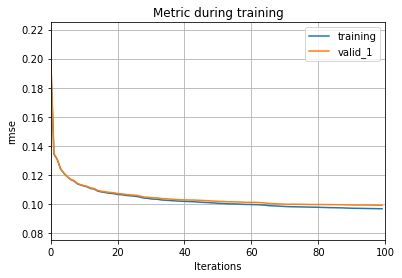

Plotting feature importances...


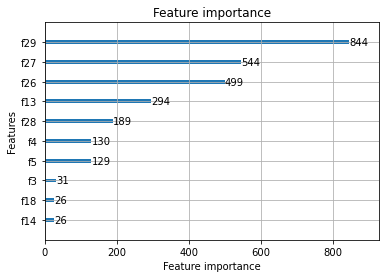

Plotting 4th tree...


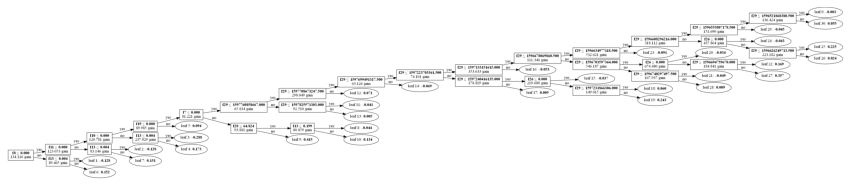

Plotting 4th tree with graphviz...
保存模型...
开始预测...
预估结果的rmse为:
0.09910050194575452


In [11]:
from pathlib import Path

import pandas as pd

import lightgbm as lgb

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

print('Loading data...')
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'auc'},
    'num_leaves': 31,
    'learning_rate': 1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
    callbacks=[
        lgb.record_evaluation(evals_result)
    ]
)

print('Plotting metrics recorded during training...')#画出训练结果
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

print('Plotting feature importances...')#画特征重要性排序
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

# print('Plotting split value histogram...')
# ax = lgb.plot_split_value_histogram(gbm, feature='f24', bins='auto')
# plt.show()

print('Plotting 4th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 4th tree with graphviz...')#导出决策树的pdf图像到本地
graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree4')
graph.render(view=True)


# 保存模型
print('保存模型...')
# 保存模型到文件中
gbm.save_model('model.txt')

print('开始预测...')
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# 评估
print('预估结果的rmse为:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

Plotting 93th tree...


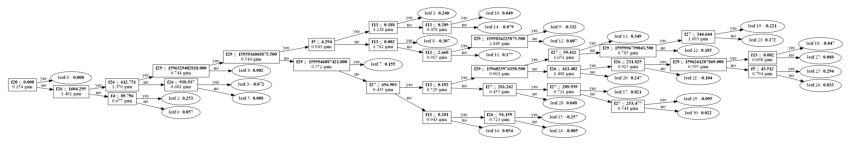

In [12]:
print('Plotting 93th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=93, figsize=(15, 15), show_info=['split_gain'])
plt.show()

In [14]:
graph = lgb.create_tree_digraph(gbm, tree_index=93, name='Tree4')
graph.render(view=True)

'Tree4.gv.pdf'

In [15]:
X_test['y_pred'] = y_pred
X_test

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp,y_pred
4310534,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597257721924,2.710919
1060734,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1595771967850,2.635026
5050226,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,310.736,189.161,0.0,1597582751016,4.198454
2513757,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1596413388876,2.642629
571106,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1595519753038,2.711819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813749,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597484908464,2.668463
2389463,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,187.853,13.519,0.0,1596362103519,3.885919
3024853,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1596623569389,2.609198
4432223,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597329220772,2.756061


In [16]:
right = TREE_2['CreateDateTime']
right

0         2020-07-02 08:17:41.149
1         2020-07-02 08:18:04.180
2         2020-07-02 08:18:08.382
3         2020-07-02 08:18:12.666
4         2020-07-02 08:18:17.281
                    ...          
5653445   2020-08-19 23:57:32.862
5653446   2020-08-19 23:57:33.879
5653447   2020-08-19 23:57:34.706
5653448   2020-08-19 23:57:34.904
5653449   2020-08-19 23:57:34.905
Name: CreateDateTime, Length: 5653450, dtype: datetime64[ns]

In [17]:
left = X_test
left

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp,y_pred
4310534,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597257721924,2.710919
1060734,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1595771967850,2.635026
5050226,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,310.736,189.161,0.0,1597582751016,4.198454
2513757,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1596413388876,2.642629
571106,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1595519753038,2.711819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813749,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597484908464,2.668463
2389463,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,187.853,13.519,0.0,1596362103519,3.885919
3024853,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1596623569389,2.609198
4432223,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597329220772,2.756061


In [18]:
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp,y_pred,CreateDateTime
4310534,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597257721924,2.710919,2020-08-12 18:42:01.924
1060734,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1595771967850,2.635026,2020-07-26 13:59:27.850
5050226,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,310.736,189.161,0.0,1597582751016,4.198454,2020-08-16 12:59:11.016
2513757,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1596413388876,2.642629,2020-08-03 00:09:48.876
571106,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1595519753038,2.711819,2020-07-23 15:55:53.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813749,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597484908464,2.668463,2020-08-15 09:48:28.464
2389463,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,187.853,13.519,0.0,1596362103519,3.885919,2020-08-02 09:55:03.519
3024853,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1596623569389,2.609198,2020-08-05 10:32:49.389
4432223,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,1597329220772,2.756061,2020-08-13 14:33:40.772


In [19]:
result['y_test'] = y_test
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp,y_pred,CreateDateTime,y_test
4310534,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,1597257721924,2.710919,2020-08-12 18:42:01.924,2.748842
1060734,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,1595771967850,2.635026,2020-07-26 13:59:27.850,2.633102
5050226,1.0,0.0,0.0,89.797974,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,310.736,189.161,0.0,1597582751016,4.198454,2020-08-16 12:59:11.016,4.079861
2513757,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,1596413388876,2.642629,2020-08-03 00:09:48.876,2.633102
571106,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,1595519753038,2.711819,2020-07-23 15:55:53.038,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813749,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,1597484908464,2.668463,2020-08-15 09:48:28.464,2.662037
2389463,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,187.853,13.519,0.0,1596362103519,3.885919,2020-08-02 09:55:03.519,3.906250
3024853,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,1596623569389,2.609198,2020-08-05 10:32:49.389,2.604167
4432223,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,1597329220772,2.756061,2020-08-13 14:33:40.772,2.748842


In [20]:
result = result.sort_values(by=['CreateDateTime'])
result

,TagValue_85,TagValue_45,TagValue_13,TagValue_70,TagValue_72,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime_85_0,deltatime_85_1,deltatime_45_0,timestamp,y_pred,CreateDateTime,y_test
9,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1593677950656,2.786232,2020-07-02 08:19:10.656,2.806713
10,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1593677956755,2.785044,2020-07-02 08:19:16.755,2.777778
12,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1593677967163,2.786232,2020-07-02 08:19:27.163,2.777778
18,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1593678008559,2.786232,2020-07-02 08:20:08.559,2.777778
21,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1593678046290,2.786232,2020-07-02 08:20:46.290,2.806713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653440,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1597881447540,2.662415,2020-08-19 23:57:27.540,2.633102
5653441,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1597881449771,2.671319,2020-08-19 23:57:29.771,2.662037
5653445,0.0,0.0,0.0,89.797974,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1597881452862,2.671319,2020-08-19 23:57:32.862,2.662037
5653448,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1597881454904,2.685324,2020-08-19 23:57:34.904,2.893518


(0.5, 6.0)

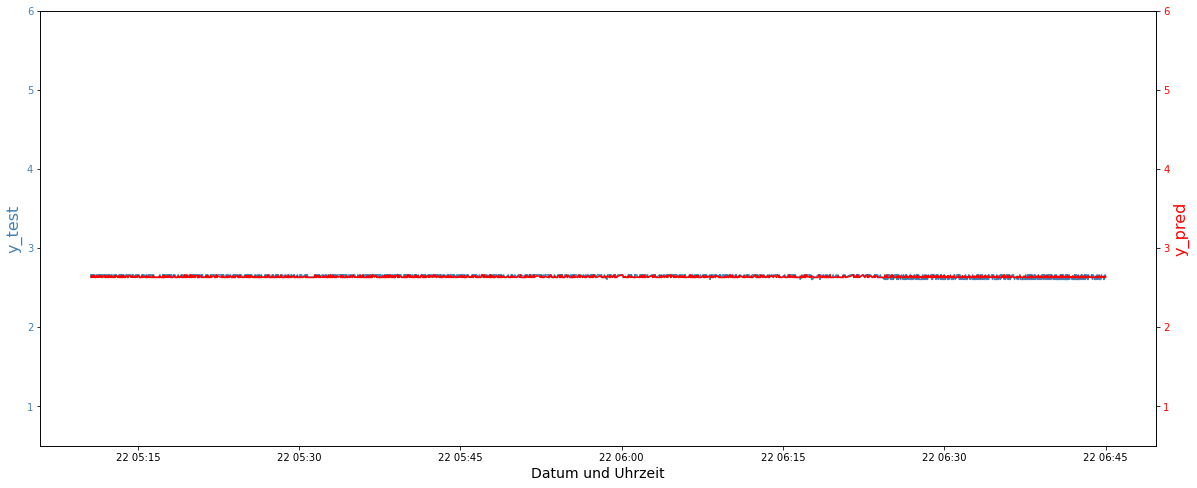

In [23]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-07-22 05:10:37')&(Daten_1['CreateDateTime']<'2020-07-22 06:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((0.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((0.5, 6))

In [51]:
#预测2020年9月份52号传感器压力值---1

In [63]:
#目标变量
TREE_3=pd.DataFrame()
# TREE_1.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)

In [64]:
ID_85_2020

,CreateDateTime,TagValue,TagId
0,2020-02-06 13:05:56.982,0.0,85
1,2020-02-06 13:06:28.636,1.0,85
2,2020-02-06 13:08:47.160,0.0,85
3,2020-02-06 13:12:33.485,1.0,85
4,2020-02-06 13:21:29.363,0.0,85
...,...,...,...
25193,2020-12-18 23:28:07.454,0.0,85
25194,2020-12-18 23:32:33.546,1.0,85
25195,2020-12-18 23:40:17.384,0.0,85
25196,2020-12-18 23:54:41.608,1.0,85


In [65]:
TREE_3 = ID_85_2020[(ID_85_2020['CreateDateTime']>'2020-09-01 00:00:00')&(ID_85_2020['CreateDateTime']<'2020-10-01 00:00:00')]
TREE_3 = TREE_3.copy()
TREE_3.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_3

,CreateDateTime,TagValue_85,TagId
12965,2020-09-01 00:01:04.450,1.0,85
12966,2020-09-01 00:04:13.635,0.0,85
12967,2020-09-01 00:10:21.653,1.0,85
12968,2020-09-01 00:18:17.487,0.0,85
12969,2020-09-01 02:40:39.839,1.0,85
...,...,...,...
15233,2020-09-30 23:15:32.149,0.0,85
15234,2020-09-30 23:29:30.140,1.0,85
15235,2020-09-30 23:38:45.062,0.0,85
15236,2020-09-30 23:51:02.318,1.0,85


In [66]:
def zusammen_1(data,TREE_3):
    data = data[(data['CreateDateTime']>'2020-09-01 00:00:00')&(data['CreateDateTime']<'2020-10-01 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_3

In [67]:
# TREE_1 = zusammen(ID_85_2020,TREE_1)
# TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_3 = zusammen_1(ID_45_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_3 = zusammen_1(ID_70_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_3 = zusammen_1(ID_86_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_3 = zusammen_1(ID_133_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_3 = zusammen_1(ID_134_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_3 = zusammen_1(ID_135_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_3 = zusammen_1(ID_136_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_3 = zusammen_1(ID_137_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_3 = zusammen_1(ID_138_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_3['TagValue_85'] = TREE_3['TagValue_85'].fillna(method = "ffill")
TREE_3['TagValue_86'] = TREE_3['TagValue_86'].fillna(method = "ffill")
TREE_3['TagValue_45'] = TREE_3['TagValue_45'].fillna(method = "ffill")
TREE_3['TagValue_70'] = TREE_3['TagValue_70'].fillna(method = "ffill")
TREE_3['TagValue_133'] = TREE_3['TagValue_133'].fillna(method = "ffill")
TREE_3['TagValue_134'] = TREE_3['TagValue_134'].fillna(method = "ffill")
TREE_3['TagValue_135'] = TREE_3['TagValue_135'].fillna(method = "ffill")
TREE_3['TagValue_136'] = TREE_3['TagValue_136'].fillna(method = "ffill")
TREE_3['TagValue_137'] = TREE_3['TagValue_137'].fillna(method = "ffill")
TREE_3['TagValue_138'] = TREE_3['TagValue_138'].fillna(method = "ffill")
TREE_3['diff_float'] = TREE_3['CreateDateTime'].diff().dt.total_seconds()
TREE_3

,CreateDateTime,TagValue_85,TagId,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
0,2020-09-01 00:00:00.940,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-01 00:00:01.369,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.429
2,2020-09-01 00:00:31.386,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,30.017
3,2020-09-01 00:00:31.777,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.391
4,2020-09-01 00:01:01.808,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,30.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112191,2020-09-30 23:59:21.514,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399
112192,2020-09-30 23:59:34.216,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.702
112193,2020-09-30 23:59:34.217,0.0,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
112194,2020-09-30 23:59:51.598,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,17.381


In [68]:
TREE_3.loc[TREE_3['diff_float'] > 1800]

,CreateDateTime,TagValue_85,TagId,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
136,2020-09-01 02:39:46.627,0.0,NaN,0.0,1.531982,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8313.579
3130,2020-09-01 16:32:41.417,0.0,NaN,0.0,0.292969,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15773.723
17277,2020-09-04 08:12:23.837,0.0,NaN,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,93894.174
17279,2020-09-04 09:52:39.559,0.0,NaN,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5975.220
17281,2020-09-04 14:46:30.762,0.0,NaN,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17199.392
17291,2020-09-04 18:50:37.530,0.0,NaN,0.0,1.470947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11877.975
18056,2020-09-05 00:43:29.091,0.0,NaN,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13653.418
36891,2020-09-08 14:38:38.661,0.0,NaN,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,115569.063
37243,2020-09-08 18:31:32.679,0.0,NaN,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8112.214
42184,2020-09-09 16:49:11.470,0.0,NaN,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23775.893


In [69]:
# def NaNjgtc(data):
# #     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
# #     X = TREE_1[columns]
# #     X.isnull().sum()
# #     X.loc[(X['diff_float'] > 1800)]
#     data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
# #     X.loc[(X['diff_float'] > 1800)]
# #     X.isnull().sum()
#     return data

In [70]:
# TREE_2 = NaNjgtc(TREE_1)
# TREE_2

In [71]:
TREE_3 = TREE_3.drop('TagId',axis = 1)
TREE_3['TagValue_133_lag1'] = TREE_3['TagValue_133'].shift(1)
TREE_3['TagValue_133_lag2'] = TREE_3['TagValue_133'].shift(2)
TREE_3['TagValue_134_lag1'] = TREE_3['TagValue_134'].shift(1)
TREE_3['TagValue_134_lag2'] = TREE_3['TagValue_134'].shift(2)
TREE_3['TagValue_135_lag1'] = TREE_3['TagValue_135'].shift(1)
TREE_3['TagValue_135_lag2'] = TREE_3['TagValue_135'].shift(2)
TREE_3['TagValue_136_lag1'] = TREE_3['TagValue_136'].shift(1)
TREE_3['TagValue_136_lag2'] = TREE_3['TagValue_136'].shift(2)
TREE_3['TagValue_137_lag1'] = TREE_3['TagValue_137'].shift(1)
TREE_3['TagValue_137_lag2'] = TREE_3['TagValue_137'].shift(2)
TREE_3['TagValue_138_lag1'] = TREE_3['TagValue_138'].shift(1)
TREE_3['TagValue_138_lag2'] = TREE_3['TagValue_138'].shift(2)

In [72]:
gh_1 = pd.DataFrame()
gh_1['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh_1['CreateDateTime_0'] = ID_85_2020['CreateDateTime']
gh_1['TagValue'] = ID_85_2020['TagValue']
gh_1['TagId'] = ID_85_2020['TagId']
gh_1

,CreateDateTime,CreateDateTime_0,TagValue,TagId
0,2020-02-06 13:05:56.982,2020-02-06 13:05:56.982,0.0,85
1,2020-02-06 13:06:28.636,2020-02-06 13:06:28.636,1.0,85
2,2020-02-06 13:08:47.160,2020-02-06 13:08:47.160,0.0,85
3,2020-02-06 13:12:33.485,2020-02-06 13:12:33.485,1.0,85
4,2020-02-06 13:21:29.363,2020-02-06 13:21:29.363,0.0,85
...,...,...,...,...
25193,2020-12-18 23:28:07.454,2020-12-18 23:28:07.454,0.0,85
25194,2020-12-18 23:32:33.546,2020-12-18 23:32:33.546,1.0,85
25195,2020-12-18 23:40:17.384,2020-12-18 23:40:17.384,0.0,85
25196,2020-12-18 23:54:41.608,2020-12-18 23:54:41.608,1.0,85


In [73]:
TREE_3 = zusammen_1(gh_1,TREE_3)
TREE_3['CreateDateTime_0'] = TREE_3['CreateDateTime_0'].fillna(method = "ffill")
TREE_3 = TREE_3.drop('TagValue',axis = 1)
TREE_3['deltatime'] = TREE_3['CreateDateTime'] - TREE_3['CreateDateTime_0'] 
TREE_3['deltatime'] = TREE_3['deltatime'].dt.total_seconds()
TREE_3=TREE_3.copy()
TREE_3['timestamp'] = TREE_3['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_3 = TREE_3.dropna()
TREE_3

,CreateDateTime,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,CreateDateTime_0,deltatime,timestamp
17277,2020-09-04 08:12:23.837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.144,1599207143837
17278,2020-09-04 08:13:04.339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94086.646,1599207184339
17279,2020-09-04 09:52:39.559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,100061.866,1599213159559
17280,2020-09-04 09:59:51.370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,100493.677,1599213591370
17281,2020-09-04 14:46:30.762,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,117693.069,1599230790762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112191,2020-09-30 23:59:21.514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:51:02.318,499.196,1601510361514
112192,2020-09-30 23:59:34.216,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:51:02.318,511.898,1601510374216
112193,2020-09-30 23:59:34.217,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,0.000,1601510374217
112194,2020-09-30 23:59:51.598,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,17.381,1601510391598


In [74]:
TREE_3.isnull().sum()

CreateDateTime       0
TagValue_85          0
TagValue_45          0
TagValue_70          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
CreateDateTime_0     0
deltatime            0
timestamp            0
dtype: int64

In [75]:
TREE_3 = TREE_3.reset_index(drop=True)
TREE_3

,CreateDateTime,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,CreateDateTime_0,deltatime,timestamp
0,2020-09-04 08:12:23.837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.144,1599207143837
1,2020-09-04 08:13:04.339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94086.646,1599207184339
2,2020-09-04 09:52:39.559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,100061.866,1599213159559
3,2020-09-04 09:59:51.370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,100493.677,1599213591370
4,2020-09-04 14:46:30.762,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,117693.069,1599230790762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94914,2020-09-30 23:59:21.514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:51:02.318,499.196,1601510361514
94915,2020-09-30 23:59:34.216,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:51:02.318,511.898,1601510374216
94916,2020-09-30 23:59:34.217,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,0.000,1601510374217
94917,2020-09-30 23:59:51.598,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,17.381,1601510391598


In [76]:
X_test_09 = TREE_3.drop('CreateDateTime_0',axis = 1)
X_test_09 = X_test_09.drop('CreateDateTime',axis = 1)
X_test_09

,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,...,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime,timestamp
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94046.144,1599207143837
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94086.646,1599207184339
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100061.866,1599213159559
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100493.677,1599213591370
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117693.069,1599230790762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,499.196,1601510361514
94915,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.898,1601510374216
94916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1601510374217
94917,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.381,1601510391598


In [85]:
y_pred_09 = gbm.predict(X_test_09, num_iteration=gbm.best_iteration_)

In [86]:
y_pred_09

array([2.91668938, 2.77358791, 2.77358791, ..., 4.58046783, 2.58792842,
       3.21901895])

In [80]:
def pred_test(y_pred,X_test,y_test):
    X_test['y_pred'] = y_pred
    right = TREE_2.set_index('timestamp')['CreateDateTime']
    left = X_test
    result = left.join(right, on='timestamp')
    result['y_test'] = y_test
    result = result.sort_values(by=['timestamp'])
    return result

In [87]:
X_test_09['y_pred_09'] = y_pred_09
right = TREE_3.set_index('timestamp')['CreateDateTime']
left = X_test_09
result = left.join(right, on='timestamp')
result = result.sort_values(by=['timestamp'])

(1.5, 6.0)

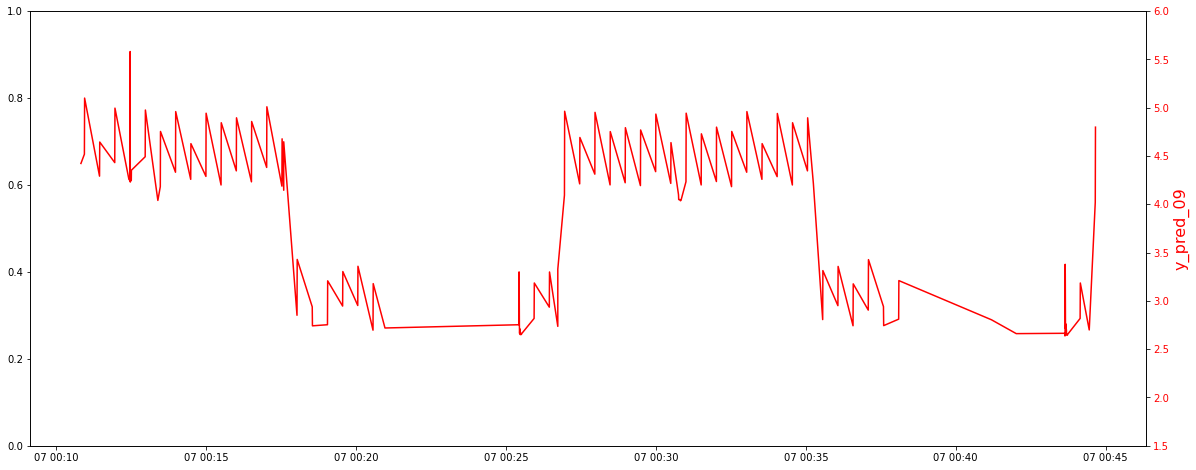

In [88]:
Daten_1=result
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-07 00:10:37')&(Daten_1['CreateDateTime']<'2020-09-07 00:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


# ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
# ax.set_ylabel('y_test', color=col1, fontsize=16)
# ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
# ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((1.5, 6))

In [90]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


(1.5, 6.0)

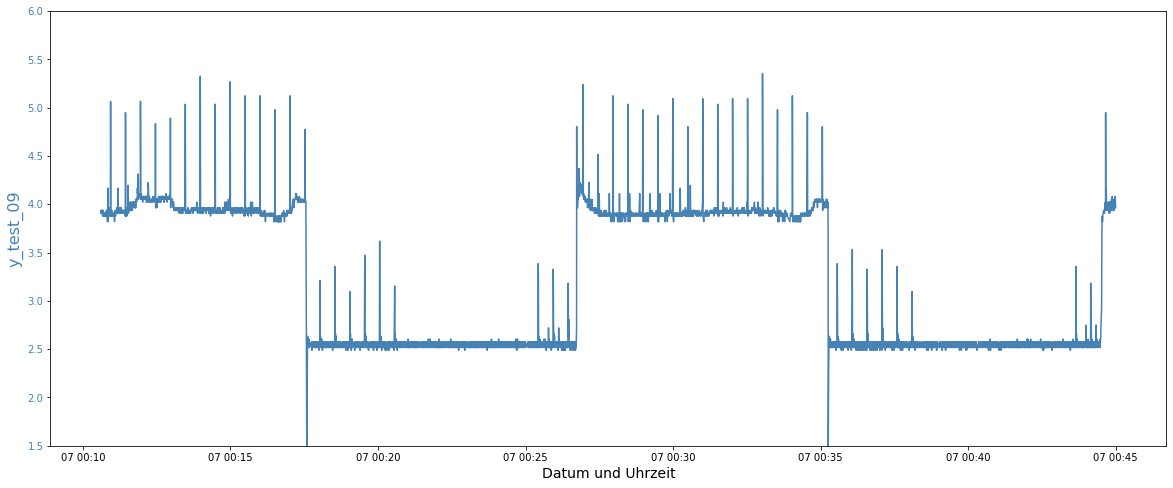

In [91]:
Daten_1=ID_52_2020
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-07 00:10:37')&(Daten_1['CreateDateTime']<'2020-09-07 00:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test_09', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


# ax2 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
# ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
# ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((1.5, 6))

In [26]:
#预测2020年9月份52号传感器压力值---2

In [27]:
#目标变量
TREE_4=pd.DataFrame()
TREE_4 = ID_52_2020[(ID_52_2020['CreateDateTime']>'2020-09-01 00:00:00')&(ID_52_2020['CreateDateTime']<'2020-10-01 00:00:00')]
TREE_4 = TREE_4.copy()
TREE_4.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)

In [28]:
def zusammen_2(data,TREE_4):
    data = data[(data['CreateDateTime']>'2020-09-01 00:00:00')&(data['CreateDateTime']<'2020-10-01 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_4 = TREE_4.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_4 = TREE_4.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_4

In [43]:
TREE_4 = zusammen_2(ID_85_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_4 = zusammen_2(ID_45_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_13'}, inplace=True)
TREE_4 = zusammen_2(ID_70_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_72'}, inplace=True)
TREE_4 = zusammen_2(ID_86_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_4 = zusammen_2(ID_133_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_4 = zusammen_2(ID_134_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_4 = zusammen_2(ID_135_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_4 = zusammen_2(ID_136_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_4 = zusammen_2(ID_137_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_4 = zusammen_2(ID_138_2020,TREE_4)
TREE_4.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_4['TagValue_85'] = TREE_4['TagValue_85'].fillna(method = "ffill")
TREE_4['TagValue_86'] = TREE_4['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_13'] = TREE_1['TagValue_13'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_72'] = TREE_1['TagValue_72'].fillna(method = "ffill")
TREE_4['TagValue_133'] = TREE_4['TagValue_133'].fillna(method = "ffill")
TREE_4['TagValue_134'] = TREE_4['TagValue_134'].fillna(method = "ffill")
TREE_4['TagValue_135'] = TREE_4['TagValue_135'].fillna(method = "ffill")
TREE_4['TagValue_136'] = TREE_4['TagValue_136'].fillna(method = "ffill")
TREE_4['TagValue_137'] = TREE_4['TagValue_137'].fillna(method = "ffill")
TREE_4['TagValue_138'] = TREE_4['TagValue_138'].fillna(method = "ffill")
TREE_4['diff_float'] = TREE_4['CreateDateTime'].diff().dt.total_seconds()
TREE_4

MemoryError: Unable to allocate 24.3 MiB for an array with shape (1, 3186125) and data type datetime64[ns]

In [30]:
TREE_4.loc[TREE_4['diff_float'] > 1800]

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
1986285,2020-09-21 09:35:13.059,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,780593.443


In [31]:
def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

In [32]:
TREE_4 = NaNjgtc(TREE_4)
TREE_4

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
0,2020-09-01 00:00:00.545,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-01 00:00:00.754,2.575232,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209
2,2020-09-01 00:00:00.940,3.096065,52.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.186
3,2020-09-01 00:00:01.158,3.298611,52.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.218
4,2020-09-01 00:00:01.369,3.096065,52.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884974,2020-09-30 23:59:55.472,2.604167,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398
3884975,2020-09-30 23:59:58.136,2.633102,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.664
3884976,2020-09-30 23:59:58.342,2.604167,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
3884977,2020-09-30 23:59:59.373,2.633102,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031


In [33]:
TREE_4 = TREE_4.drop('TagId',axis = 1)
TREE_4['TagValue_133_lag1'] = TREE_4['TagValue_133'].shift(1)
TREE_4['TagValue_133_lag2'] = TREE_4['TagValue_133'].shift(2)
TREE_4['TagValue_134_lag1'] = TREE_4['TagValue_134'].shift(1)
TREE_4['TagValue_134_lag2'] = TREE_4['TagValue_134'].shift(2)
TREE_4['TagValue_135_lag1'] = TREE_4['TagValue_135'].shift(1)
TREE_4['TagValue_135_lag2'] = TREE_4['TagValue_135'].shift(2)
TREE_4['TagValue_136_lag1'] = TREE_4['TagValue_136'].shift(1)
TREE_4['TagValue_136_lag2'] = TREE_4['TagValue_136'].shift(2)
TREE_4['TagValue_137_lag1'] = TREE_4['TagValue_137'].shift(1)
TREE_4['TagValue_137_lag2'] = TREE_4['TagValue_137'].shift(2)
TREE_4['TagValue_138_lag1'] = TREE_4['TagValue_138'].shift(1)
TREE_4['TagValue_138_lag2'] = TREE_4['TagValue_138'].shift(2)

In [34]:
gh_2 = pd.DataFrame()
gh_2['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh_2['CreateDateTime_0'] = ID_85_2020['CreateDateTime']
gh_2['TagValue'] = ID_85_2020['TagValue']
gh_2['TagId'] = ID_85_2020['TagId']
gh_2

,CreateDateTime,CreateDateTime_0,TagValue,TagId
0,2020-02-06 13:05:56.982,2020-02-06 13:05:56.982,0.0,85
1,2020-02-06 13:06:28.636,2020-02-06 13:06:28.636,1.0,85
2,2020-02-06 13:08:47.160,2020-02-06 13:08:47.160,0.0,85
3,2020-02-06 13:12:33.485,2020-02-06 13:12:33.485,1.0,85
4,2020-02-06 13:21:29.363,2020-02-06 13:21:29.363,0.0,85
...,...,...,...,...
25193,2020-12-18 23:28:07.454,2020-12-18 23:28:07.454,0.0,85
25194,2020-12-18 23:32:33.546,2020-12-18 23:32:33.546,1.0,85
25195,2020-12-18 23:40:17.384,2020-12-18 23:40:17.384,0.0,85
25196,2020-12-18 23:54:41.608,2020-12-18 23:54:41.608,1.0,85


In [36]:
TREE_4 = zusammen_2(gh_2,TREE_4)
TREE_4['CreateDateTime_0'] = TREE_4['CreateDateTime_0'].fillna(method = "ffill")
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4['deltatime'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_0'] 
TREE_4['deltatime'] = TREE_4['deltatime'].dt.total_seconds()
TREE_4=TREE_4.copy()
TREE_4['timestamp'] = TREE_4['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_4 = TREE_4.dropna()
TREE_4

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,CreateDateTime_0,deltatime,timestamp
627876,2020-09-04 08:12:24.049,2.662037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.356,1599207144049
627877,2020-09-04 08:12:24.244,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.551,1599207144244
627878,2020-09-04 08:12:24.658,2.662037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.965,1599207144658
627879,2020-09-04 08:12:24.849,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94047.156,1599207144849
627880,2020-09-04 08:12:26.486,2.662037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94048.793,1599207146486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884974,2020-09-30 23:59:55.472,2.604167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,21.255,1601510395472
3884975,2020-09-30 23:59:58.136,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,23.919,1601510398136
3884976,2020-09-30 23:59:58.342,2.604167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,24.125,1601510398342
3884977,2020-09-30 23:59:59.373,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,25.156,1601510399373


In [ ]:
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_2 = TREE_2.dropna()
TREE_2

In [37]:
TREE_4.isnull().sum()

CreateDateTime       0
TagValue_52          0
TagValue_85          0
TagValue_45          0
TagValue_70          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
CreateDateTime_0     0
deltatime            0
timestamp            0
dtype: int64

In [38]:
TREE_4 = TREE_4.reset_index(drop=True)
TREE_4

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,CreateDateTime_0,deltatime,timestamp
0,2020-09-04 08:12:24.049,2.662037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.356,1599207144049
1,2020-09-04 08:12:24.244,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.551,1599207144244
2,2020-09-04 08:12:24.658,2.662037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94046.965,1599207144658
3,2020-09-04 08:12:24.849,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94047.156,1599207144849
4,2020-09-04 08:12:26.486,2.662037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-03 06:04:57.693,94048.793,1599207146486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183186,2020-09-30 23:59:55.472,2.604167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,21.255,1601510395472
3183187,2020-09-30 23:59:58.136,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,23.919,1601510398136
3183188,2020-09-30 23:59:58.342,2.604167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,24.125,1601510398342
3183189,2020-09-30 23:59:59.373,2.633102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-30 23:59:34.217,25.156,1601510399373


In [39]:
X_test_09_2 = TREE_4.drop('CreateDateTime_0',axis = 1)
X_test_09_2 = X_test_09_2.drop('CreateDateTime',axis = 1)
X_test_09_2 = X_test_09_2.drop('TagValue_52',axis = 1)
X_test_09_2

,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,...,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime,timestamp
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94046.356,1599207144049
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94046.551,1599207144244
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94046.965,1599207144658
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94047.156,1599207144849
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94048.793,1599207146486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183186,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.255,1601510395472
3183187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.919,1601510398136
3183188,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.125,1601510398342
3183189,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.156,1601510399373


In [41]:
y_pred_09_2 = gbm.predict(X_test_09_2, num_iteration=gbm.best_iteration)

LightGBMError: The number of features in data (25) is not the same as it was in training data (29).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [115]:
y_pred_09_2

array([2.74376689, 2.74376689, 2.76080472, ..., 2.65161842, 2.66002773,
       2.65161842])

In [80]:
def pred_test(y_pred,X_test,y_test):
    X_test['y_pred'] = y_pred
    right = TREE_2.set_index('timestamp')['CreateDateTime']
    left = X_test
    result = left.join(right, on='timestamp')
    result['y_test'] = y_test
    result = result.sort_values(by=['timestamp'])
    return result

In [126]:
X_test_09_2['y_pred_09_2'] = y_pred_09_2
right = TREE_4.set_index('timestamp')['CreateDateTime']
left = X_test_09_2
result = left.join(right, on='timestamp')
result = result.sort_values(by=['timestamp'])
result['y_test'] = TREE_4['TagValue_52']
result

,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,...,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime,timestamp,y_pred_09_2,CreateDateTime,y_test
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,94046.356,1599207144049,2.743767,2020-09-04 08:12:24.049,2.662037
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,94046.551,1599207144244,2.743767,2020-09-04 08:12:24.244,2.633102
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,94046.965,1599207144658,2.760805,2020-09-04 08:12:24.658,2.662037
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,94047.156,1599207144849,2.743767,2020-09-04 08:12:24.849,2.633102
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,94048.793,1599207146486,2.773588,2020-09-04 08:12:26.486,2.662037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183186,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.255,1601510395472,2.657556,2020-09-30 23:59:55.472,2.604167
3183187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.919,1601510398136,2.660028,2020-09-30 23:59:58.136,2.633102
3183188,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.125,1601510398342,2.651618,2020-09-30 23:59:58.342,2.604167
3183189,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.156,1601510399373,2.660028,2020-09-30 23:59:59.373,2.633102


(1.5, 6.0)

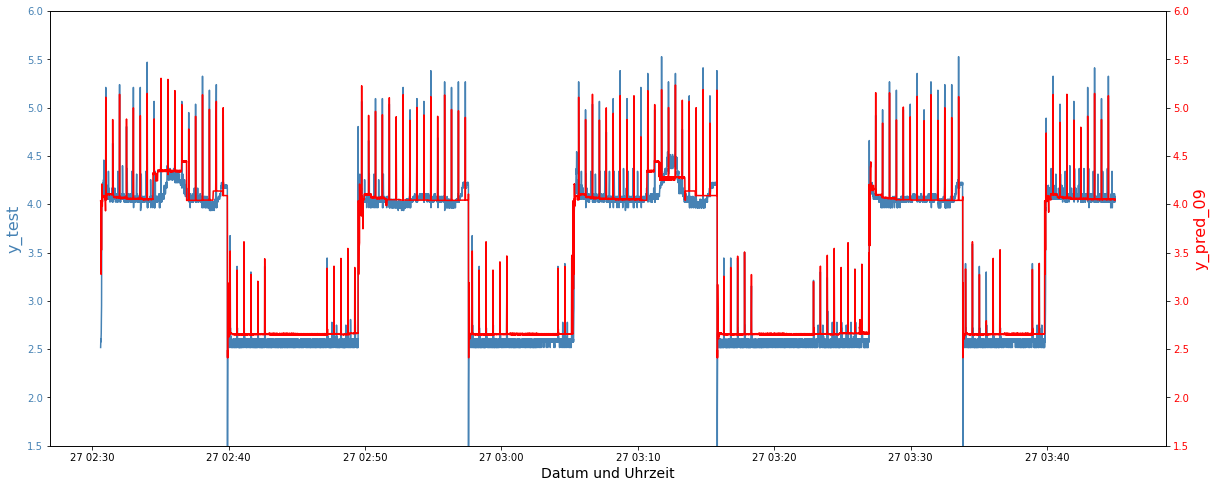

In [133]:
Daten_1=result
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_1['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09_2, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((1.5, 6))

In [129]:
print('预测结果的rmse是:')
print(mean_squared_error(result['y_test'], y_pred_09_2) ** 0.5)

预测结果的rmse是:
0.1758394704405408


In [90]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


(1.5, 6.0)

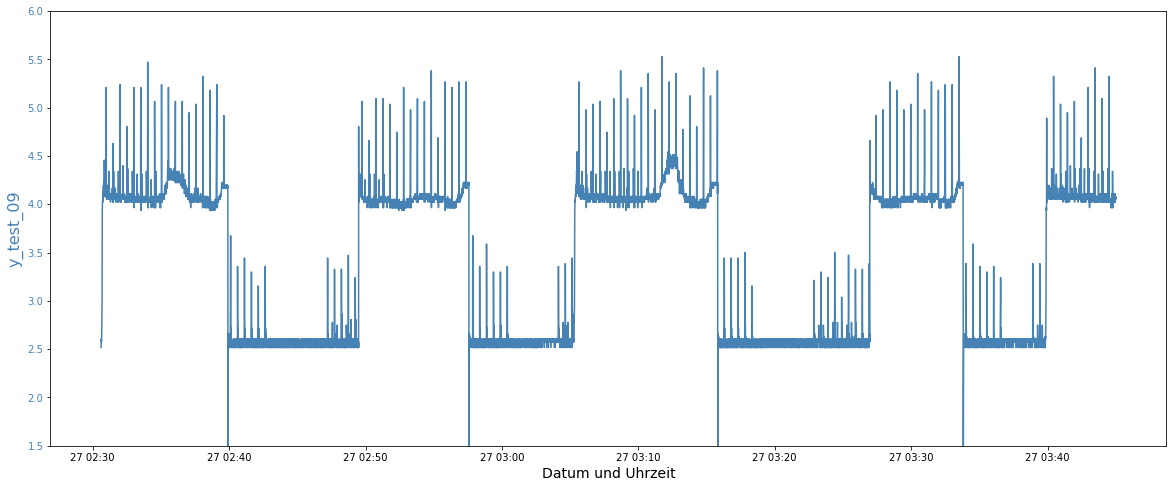

In [134]:
Daten_1=ID_52_2020
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_1['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test_09', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


# ax2 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax2.set_ylabel('y_pred_09', color=col2, fontsize=16)
# ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_09, color=col2)
# ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((1.5, 6))